## Importing Libraries

In [5]:
import time,datetime
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection, preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV

In [70]:
import warnings
warnings.filterwarnings("ignore")

## Exploring Dataset

In [7]:
df = pd.read_csv('datasets/titanic_train.csv')

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

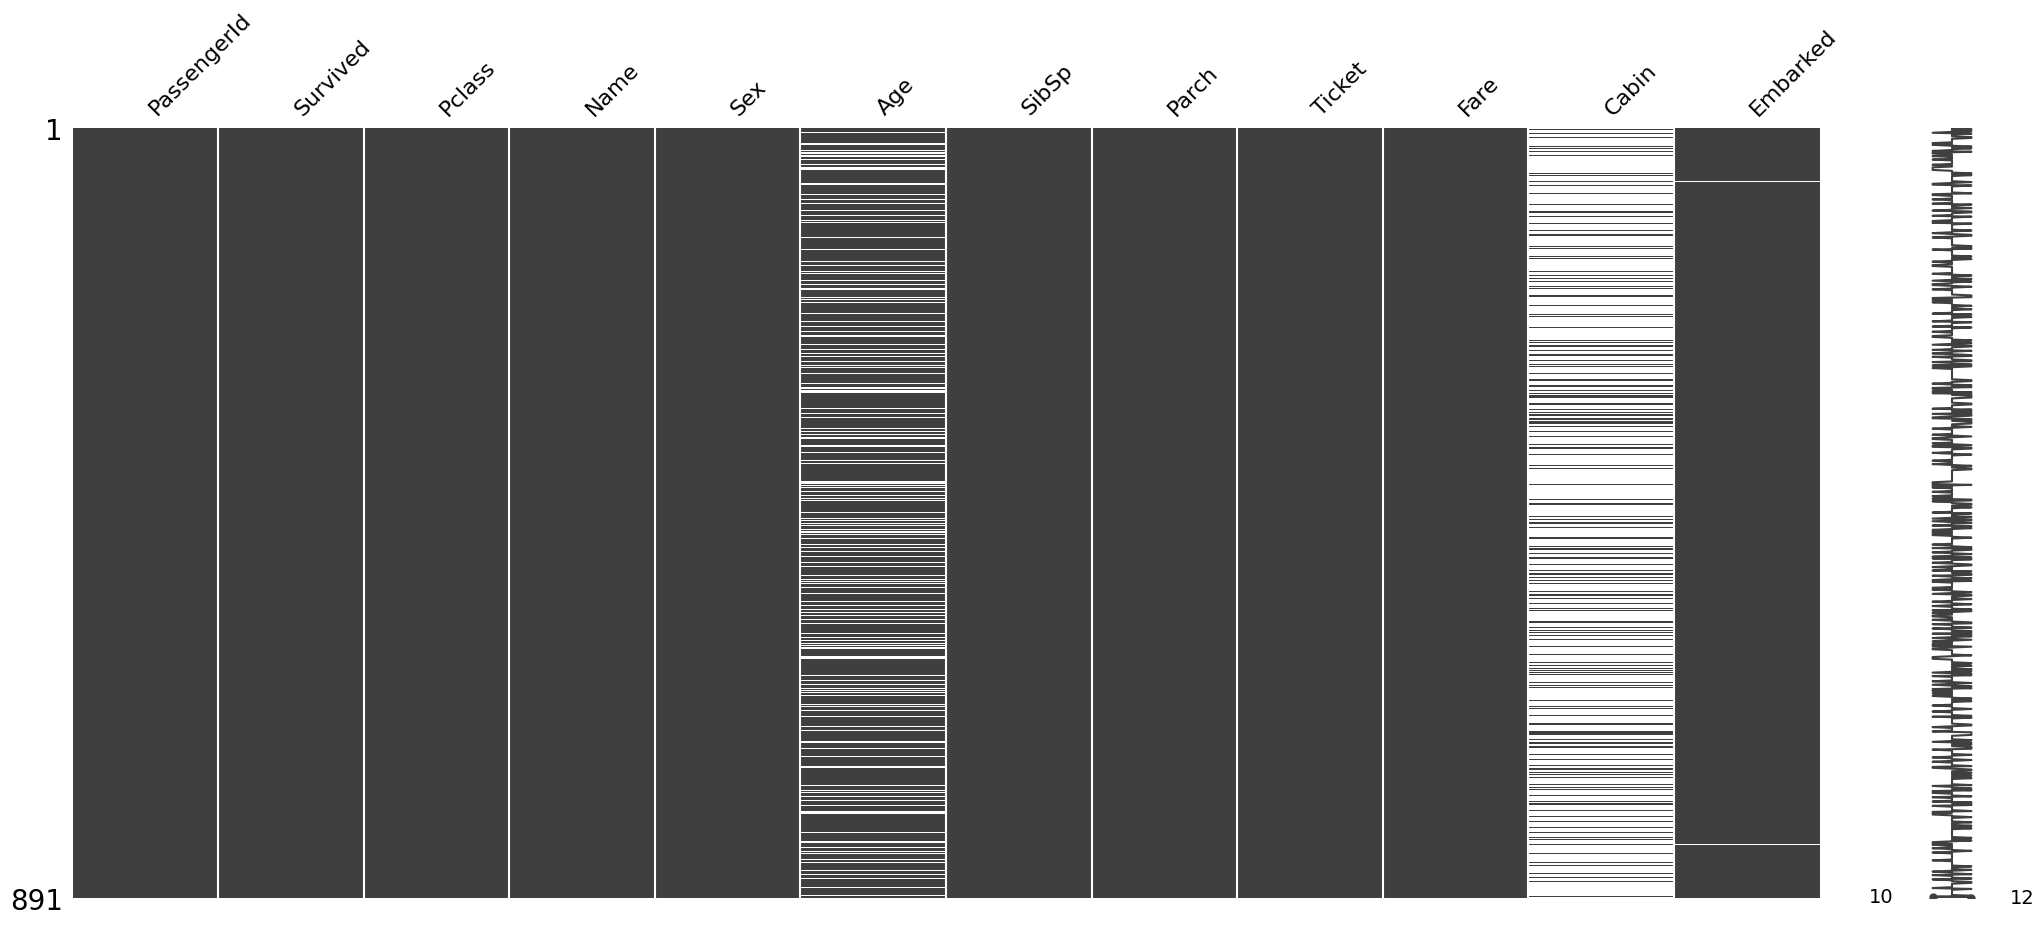

In [11]:
missingno.matrix(df,figsize=(25,10))

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Creating two dataframes for continous and discrete variables

In [22]:
df_bin = pd.DataFrame() # for discretised continous variables(bins/buckets)
df_con = pd.DataFrame() # for continous variables

## Exploring each features individually

### Survived

In [65]:
survived = (df['Survived'] == 1)
survival_percentage = (len(df.loc[survived])/len(df['Survived']))*100
died = (df['Survived'] == 0)
death_percentage = (len(df.loc[died])/len(df['Survived']))*100
print(f'Survival Percentage on Titanic:{survival_percentage:.2f}')
print(f'Death Percentage on Titanic:{death_percentage:.2f}')

Survival Percentage on Titanic:38.38
Death Percentage on Titanic:61.62


Survived
0    549
1    342
Name: count, dtype: int64

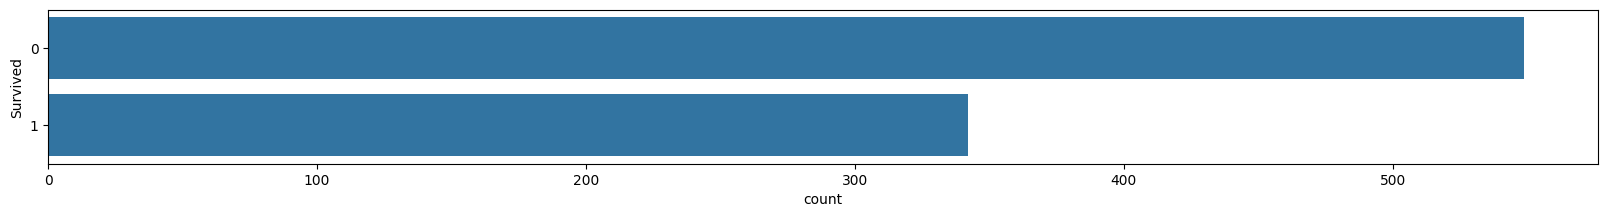

In [75]:
#Exploring Survived Column
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=df)
df['Survived'].value_counts()

In [68]:
#Adding them to new df
df_bin['Survived'] = df['Survived']
df_con['Survived'] = df['Survived']

### Pclass

<Axes: xlabel='Pclass', ylabel='Density'>

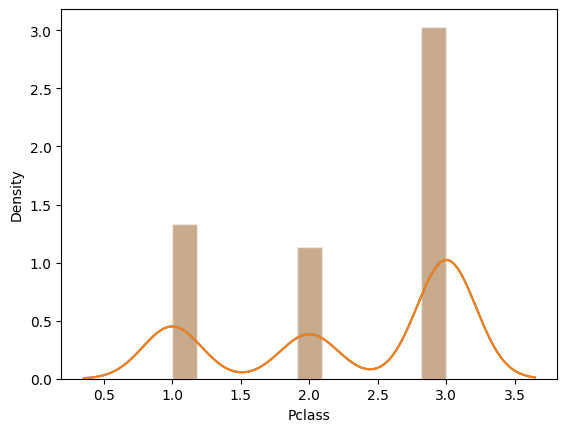

In [72]:
sns.histplot(df['Pclass'],kde=True,stat='density',kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(df['Pclass'],kde=True,stat='density',kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))

#Using distplot 
#sns.distplot(df['Pclass'])
#sns.distplot(df['Pclass'])

In [16]:
#Adding them to new df
df_bin['Pclass'] = df['Pclass']
df_con['Pclass'] = df['Pclass']

### Sex

<Axes: xlabel='count', ylabel='Sex'>

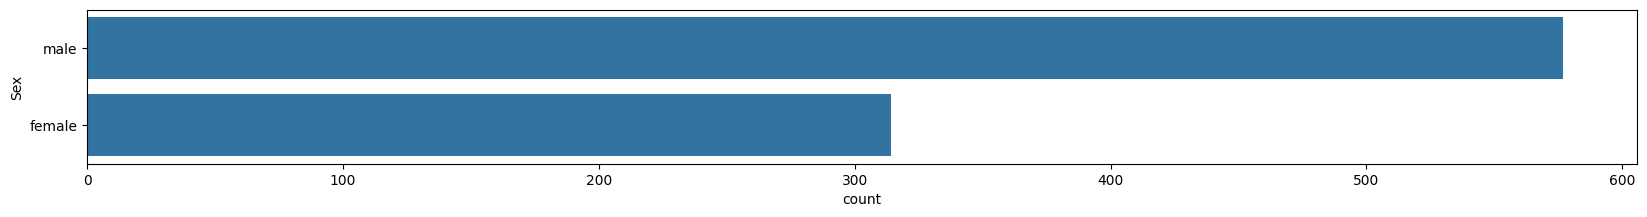

In [74]:
#Exploring Sex
plt.figure(figsize=(20,2))
sns.countplot(y='Sex',data=df)

In [77]:
male = (df['Sex'] == 'male')
male_percentage = (len(df.loc[male])/len(df['Sex']))*100
female = (df['Sex'] == 'female')
female_percentage = (len(df.loc[female])/len(df['Sex']))*100
print(f'Male Percentage on Titanic:{male_percentage:.2f}')
print(f'Female Percentage on Titanic:{female_percentage:.2f}')

Male Percentage on Titanic:64.76
Female Percentage on Titanic:35.24


In [82]:
#Add sex to dataset
df_bin['Sex'] = df['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)

df_con["Sex"] = df['Sex']


<Axes: xlabel='Sex', ylabel='Density'>

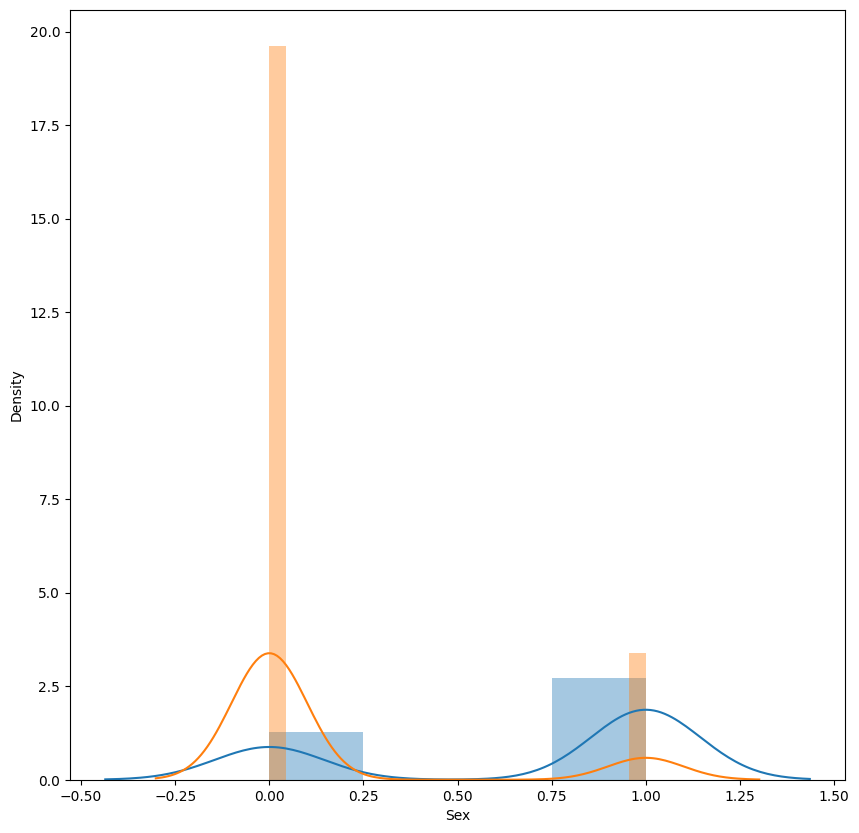

In [83]:
#How does Sex variable compare with Survival
#We can see this because they are both bianary
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'],kde_kws={'label':'Did not Suvive'})

### Age

In [86]:
#Exploring Age
df.Age.isnull().sum()

np.int64(177)

In [23]:
#Exploring SibSp
df['SibSp'].isna().sum()

np.int64(0)

In [24]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [25]:
#Adding number of sibling numbers to dataset
df_bin['SibSp'] = df['SibSp']
df_con['SibSp'] = df['SibSp']

C:\Users\Kaustubh Kasture\AppData\Local\Temp\ipykernel_17236\2095750418.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bin.loc[df_bin['Survived']==1]['SibSp'],kde_kws={'label':'Suvived'});
C:\Users\Kaustubh Kasture\AppData\Local\Temp\ipykernel_17236\2095750418.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

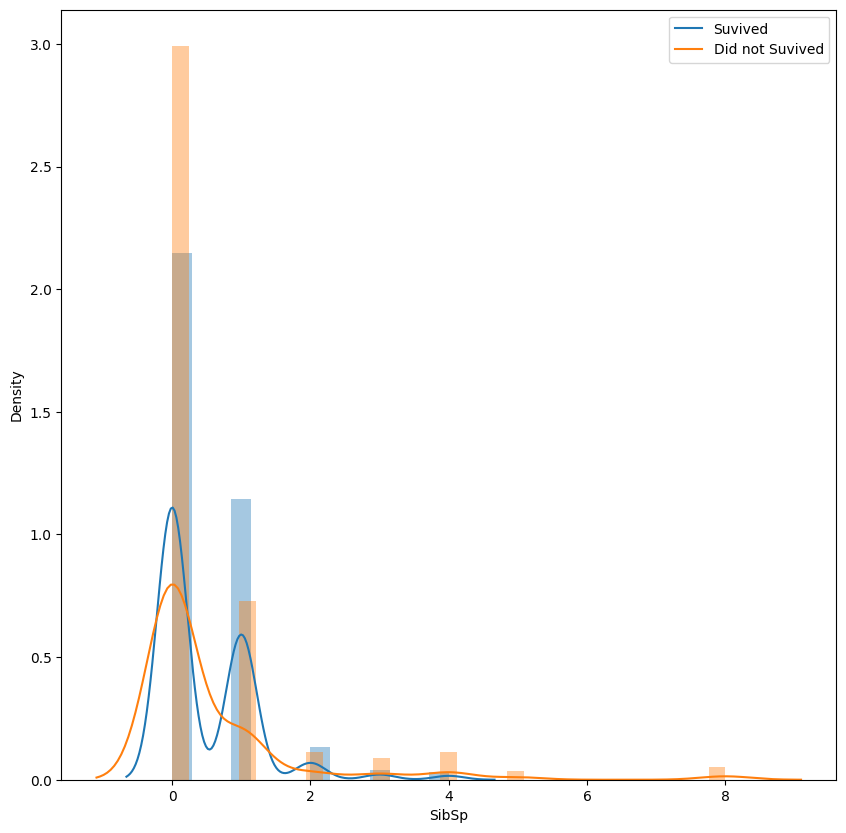

In [26]:
#How does SibSp variable compare with Survival
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['SibSp'],kde_kws={'label':'Suvived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['SibSp'],kde_kws={'label':'Did not Suvived'});
plt.legend()

In [27]:
#Exploring Parch
df['Parch'].isna().sum()

np.int64(0)

In [28]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [29]:
#Adding number of sibling numbers to dataset
df_bin['Parch'] = df['Parch']
df_con['Parch'] = df['Parch']

C:\Users\Kaustubh Kasture\AppData\Local\Temp\ipykernel_17236\18608104.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bin.loc[df_bin['Survived']==1]['Parch'])
C:\Users\Kaustubh Kasture\AppData\Local\Temp\ipykernel_17236\18608104.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bin.l

<Axes: xlabel='Parch', ylabel='Density'>

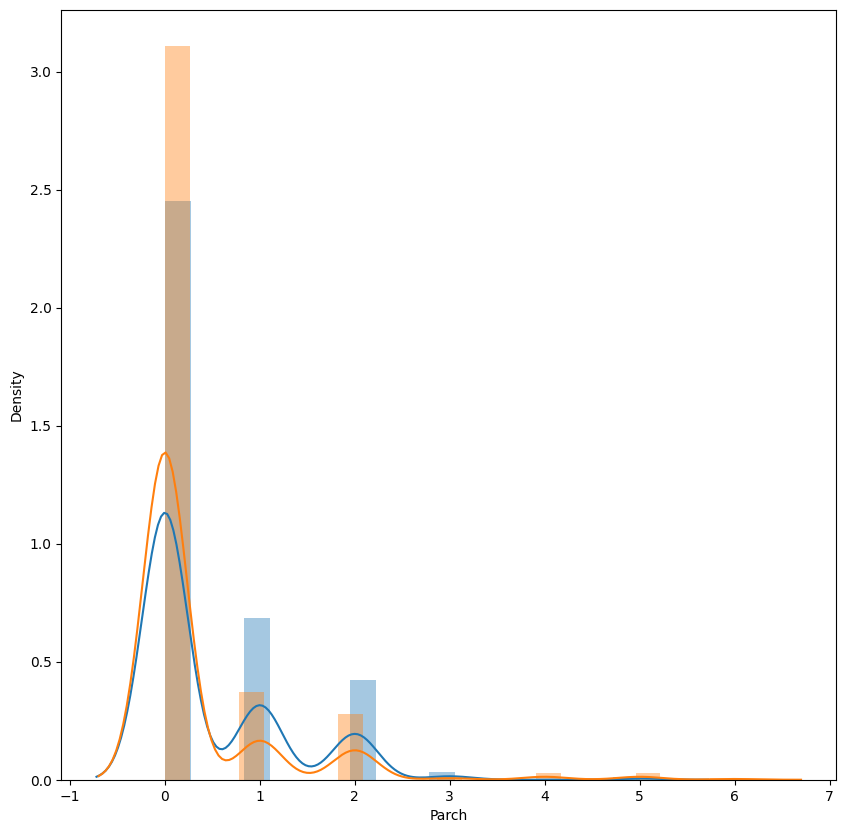

In [30]:
#How does Parch compare to Survival
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Parch'])
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Parch'])

In [31]:
#Exploring Ticket
df['Ticket'].isna().sum()

np.int64(0)

In [32]:
df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [33]:
#Exploring Fare
df['Fare'].isna().sum()

np.int64(0)

In [34]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

In [35]:
#adding Fare to dataset
df_bin['Fare'] = pd.cut(df['Fare'],bins=5,labels=list(range(1,6)))
df_con['Fare'] = df['Fare']

<Axes: >

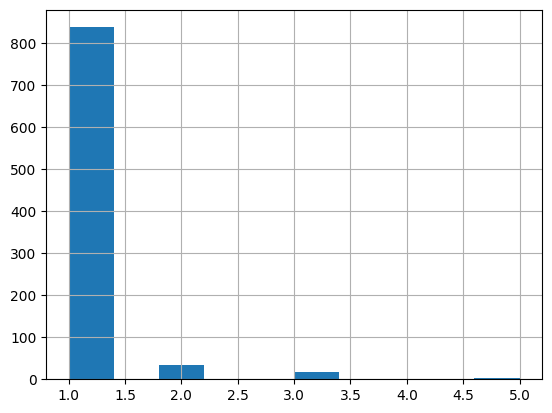

In [36]:
df_bin['Fare'].hist()

C:\Users\Kaustubh Kasture\AppData\Local\Temp\ipykernel_17236\801029965.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bin.loc[df_bin['Survived']==1]['Fare'],kde_kws={'label':'Survived'})
C:\Users\Kaustubh Kasture\AppData\Local\Temp\ipykernel_17236\801029965.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

<Axes: xlabel='Fare', ylabel='Density'>

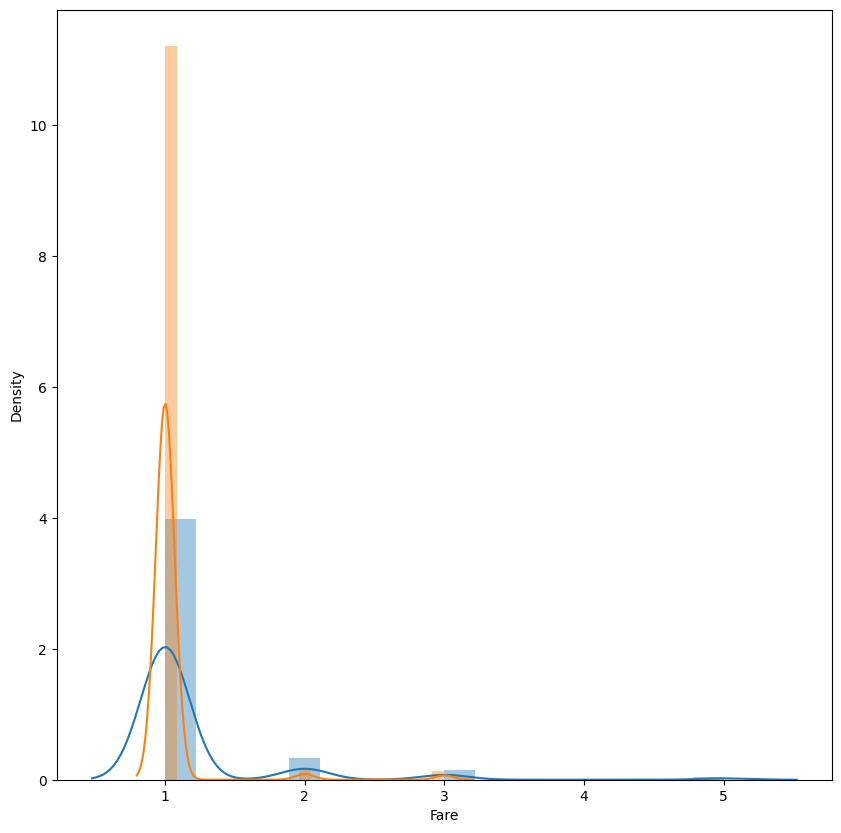

In [37]:
#How does Fare corelate with Survived
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Fare'],kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Fare'],kde_kws={'label':'Did not Survive'})

In [38]:
#Exploring Embarked
df['Embarked'].isna().sum()

np.int64(2)

In [39]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [40]:
#Adding Embarked into dataset
df_bin['Embarked'] = df['Embarked']
df_con['Embarked'] = df['Embarked']

In [41]:
print(len(df_bin.Embarked))
print(len(df_con.Embarked))
df_bin = df_bin.dropna(subset=['Embarked'])
df_con = df_con.dropna(subset=['Embarked'])
print(len(df_bin.Embarked))
print(len(df_con.Embarked))

891
891
889
889


In [42]:
#OneHotEncoding
one_hot_col = df_bin.columns.tolist()
one_hot_col.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_col)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Embarked_C,Embarked_Q,Embarked_S
0,0,False,False,True,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,1,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1,False,False,True,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,1,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,False,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [43]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [44]:
#OneHotCode the categorical values
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'],prefix='embarked')
df_sex_one_hot = pd.get_dummies(df_con['Sex'],prefix='sex')
df_plcass_one_hot = pd.get_dummies(df_con['Pclass'],prefix='pclass')

In [45]:
df_con_enc = pd.concat([df_bin,df_embarked_one_hot,df_sex_one_hot,df_plcass_one_hot],axis=1)
#Remove original Embarked,Sex and Pclass
df_con_enc = df_con_enc.drop(['Embarked','Sex','Pclass'],axis=1)
df_con_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,1,False,False,True,False,True,False,False,True
1,1,1,0,1,True,False,False,True,False,True,False,False
2,1,0,0,1,False,False,True,True,False,False,False,True
3,1,1,0,1,False,False,True,True,False,True,False,False
4,0,0,0,1,False,False,True,False,True,False,False,True


**Now Let's Start Building Models**

In [46]:
selected_df = df_con_enc

In [47]:
selected_df

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,1,False,False,True,False,True,False,False,True
1,1,1,0,1,True,False,False,True,False,True,False,False
2,1,0,0,1,False,False,True,True,False,False,False,True
3,1,1,0,1,False,False,True,True,False,True,False,False
4,0,0,0,1,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,False,False,True,False,True,False,True,False
887,1,0,0,1,False,False,True,True,False,True,False,False
888,0,1,2,1,False,False,True,True,False,False,False,True
889,1,0,0,1,True,False,False,False,True,True,False,False


In [48]:
x_train = selected_df.drop('Survived',axis=1)
y_train = selected_df.Survived

In [49]:
x_train

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,1,False,False,True,False,True,False,False,True
1,1,0,1,True,False,False,True,False,True,False,False
2,0,0,1,False,False,True,True,False,False,False,True
3,1,0,1,False,False,True,True,False,True,False,False
4,0,0,1,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,False,False,True,False,True,False,True,False
887,0,0,1,False,False,True,True,False,True,False,False
888,1,2,1,False,False,True,True,False,False,False,True
889,0,0,1,True,False,False,False,True,True,False,False


In [50]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [51]:
def fit_ml_algo(algo,x_train,y_train,cv):
    model = algo.fit(x_train,y_train)
    #Accuracy of model
    accuracy = round(model.score(x_train,y_train)*100,2)
    
    #Cross Validation
    train_pred = model_selection.cross_val_predict(algo,x_train,y_train,cv=cv,n_jobs=-1)
    #Cross Validation metric
    cv_accuracy = round(metrics.accuracy_score(y_train,train_pred)*100,2)
    
    return train_pred,accuracy,cv_accuracy

In [52]:
#Logistic Regression
start_time = time.time()
train_pred_log,acc_log,cv_acc_log = fit_ml_algo(LogisticRegression(),x_train,y_train,10)
log_time = (time.time() - start_time)
print("Accuracy:{}".format(acc_log))
print("Cross Validation Accuracy:{}".format(cv_acc_log))
print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

Accuracy:79.42
Cross Validation Accuracy:78.52
Runtime:0:00:02.334160


In [53]:
#LinearSVC
start_time = time.time()
train_pred_log,acc_log,cv_acc_log = fit_ml_algo(LinearSVC(C=1,loss='hinge'),x_train,y_train,10)
log_time = (time.time() - start_time)
print("Accuracy:{}".format(acc_log))
print("Cross Validation Accuracy:{}".format(cv_acc_log))
print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

Accuracy:78.63
Cross Validation Accuracy:78.63
Runtime:0:00:01.195585


In [54]:
#Polynomial Kernel SVM
start_time = time.time()
train_pred_log,acc_log,cv_acc_log = fit_ml_algo(SVC(kernel='poly',degree=3,coef0=1,C=5),x_train,y_train,10)
log_time = (time.time() - start_time)
print("Accuracy:{}".format(acc_log))
print("Cross Validation Accuracy:{}".format(cv_acc_log))
print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

Accuracy:83.01
Cross Validation Accuracy:79.42
Runtime:0:00:00.435580


In [55]:
#GridSearchCV for SVM
param_grid = [{'kernel':['linear'],'C':list(np.arange(1,100))}]
grid_search = GridSearchCV(SVC(),param_grid)
grid_search.fit(x_train,y_train)

D:\Dev\github\Essential-Datasets\env\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [np.int64(1), np.int64(2), np.int64(3),
                                np.int64(4), np.int64(5), np.int64(6),
                                np.int64(7), np.int64(8), np.int64(9),
                                np.int64(10), np.int64(11), np.int64(12),
                                np.int64(13), np.int64(14), np.int64(15),
                                np.int64(16), np.int64(17), np.int64(18),
                                np.int64(19), np.int64(20), np.int64(21),
                                np.int64(22), np.int64(23), np.int64(24),
                                np.int64(25), np.int64(26), np.int64(27),
                                np.int64(28), np.int64(29), np.int64(30), ...],
                          'kernel': ['linear']}])

In [56]:
grid_search.best_estimator_

SVC(C=np.int64(4), kernel='linear')

In [57]:
start_time = time.time()
train_pred_log,acc_log,cv_acc_log = fit_ml_algo(SVC(C=4,kernel='linear'),x_train,y_train,10)
log_time = (time.time() - start_time)
print("Accuracy:{}".format(acc_log))
print("Cross Validation Accuracy:{}".format(cv_acc_log))
print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

Accuracy:78.63
Cross Validation Accuracy:78.63
Runtime:0:00:00.073726


In [ ]:
#param_grid = [{'kernel':['poly'],'C':list(np.arange(1,100)),'degree':list(np.arange(1,100)),'gamma':list(np.arange(1,100))}]
#grid_search = GridSearchCV(SVC(),param_grid)
#grid_search.fit(x_train,y_train)